# Feature Engineering 

### Case Study: Predicting House Price 

The dataset house sale prices for King County, Seattle. It includes homes sold between May 2014 and May 2015. The dataset provides features the houses have and the price at which they were sold. It can be used to model house price prediction.

The dataset is available at kaggle https://www.kaggle.com/harlfoxem/housesalesprediction

Some of the attributes that are captured in the dataset are

1. No of bedrooms and bathrooms
2. Total square feet of living 
3. How many floors
4. Wether it has a basement and size of the basement
5. Grade of the house 
6. Weather it has waterfront and the quality of the view
7. When the house was built and if the house is renovated, if it is renovated?
8. Latitude and longitude
9. price of the house
10. When the house was sold

#### Let's explore the dataset to understand these attributes and their characteristics in more detail

# Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
house_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1gahiHPMB-S-CarnH6KOTr8lBFUjDQ0mF')

In [ ]:
house_df.head( 5 )

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Unique Zipcodes

The number of unique zip codes.

In [ ]:
len(house_df.zipcode.unique())

70

## Encoding Categorical Features

### OHE : One Hot Encoding

The following categorical variables will be encoded.

- waterfront
- view
- condition
- zipcode

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_encoder = OneHotEncoder()

In [ ]:
cat_features = ['waterfront', 'view', 'condition', 'zipcode']

In [ ]:
ohe_encoder.fit(house_df[cat_features])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
ohe_encoder.categories_

[array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([1, 2, 3, 4, 5]),
 array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
        98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
        98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
        98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
        98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
        98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
        98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
        98166, 98168, 98177, 98178, 98188, 98198, 98199])]

In [ ]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))

In [ ]:
encoded_cols = ohe_encoder.transform(house_df[cat_features])

In [ ]:
type(encoded_cols)

scipy.sparse.csr.csr_matrix

In [ ]:
encoded_cols_df = pd.DataFrame.sparse.from_spmatrix(encoded_cols.tocsc(), 
                                                columns=encoded_cat_names)

In [ ]:
encoded_cols_df.sample(10)

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4,condition_1,condition_2,condition_3,condition_4,condition_5,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,...,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
290,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3403,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18094,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10554,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11463,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1283,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19034,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13785,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6173,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

# Target Encoding

Features are replaced with a blend of the 
- expected value of the target given particular categorical value 
- expected value of the target over all the training data

### Regression Example

In [ ]:
house_df[['waterfront', 'price']].sample(10, random_state = 37)

,waterfront,price
2501,0,560000.0
9904,0,290000.0
298,0,404000.0
19706,0,675000.0
3706,0,286000.0
15957,0,693000.0
4301,0,899100.0
13255,0,840000.0
15386,1,840500.0
15936,0,345000.0


In [ ]:
waterfront_counts = dict(house_df['waterfront'].value_counts())

In [ ]:
waterfront_counts

{0: 21450, 1: 163}

#### Counts for each category 

In [ ]:
waterfront_means = dict(np.round(house_df
                                 .groupby('waterfront')['price']
                                 .mean(), 2))
waterfront_counts

{0: 21450, 1: 163}

#### Mean price of the house for each category: Waterfront and No Waterfront

In [ ]:
waterfront_means_df = pd.DataFrame({'waterfront': list(waterfront_means.keys()),
                                    'mean': list(waterfront_means.values())})
waterfront_means_df

,waterfront,mean
0,0,531563.60
1,1,1661876.02


In [ ]:
waterfront_counts_df = pd.DataFrame({'waterfront': list(waterfront_counts.keys()),
                                    'count': list(waterfront_counts.values())})
waterfront_counts_df

,waterfront,count
0,0,21450
1,1,163


#### Overall mean of the house prices

In [ ]:
mean_price = house_df.price.mean()
print(mean_price)

540088.1417665294


#### Calculating the weights

In [ ]:
smooth_param = 100

In [ ]:
waterfront_weights = waterfront_counts[1] / (waterfront_counts[1] + smooth_param)
print(waterfront_weights)

0.6197718631178707


In [ ]:
waterfront_encoding = ( waterfront_weights * waterfront_means[1] 
                       + ( 1 - waterfront_weights ) * mean_price )
print(waterfront_encoding)

1235340.7050823306


In [ ]:
no_waterfront_weights = waterfront_counts[0] / (waterfront_counts[0] + smooth_param)
print(no_waterfront_weights)

0.9953596287703016


In [ ]:
no_waterfront_encoding = ( no_waterfront_weights * waterfront_means[0] 
                       + ( 1 - no_waterfront_weights ) * mean_price )
no_waterfront_encoding

531603.1570383597

### Using Encoder Library

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.6 MB/s 


In [ ]:
from category_encoders import MEstimateEncoder

In [ ]:
m_estimate = MEstimateEncoder(cols = ['waterfront'], m=100.0)

In [ ]:
m_estimate.fit(house_df, house_df.price)

MEstimateEncoder(cols=['waterfront'], drop_invariant=False,
                 handle_missing='value', handle_unknown='value', m=100.0,
                 random_state=None, randomized=False, return_df=True,
                 sigma=0.05, verbose=0)

In [ ]:
{f"waterfront[{k}]": round(v, 2) for k, v in m_estimate.mapping.items()}

{'waterfront[waterfront]': waterfront
  1     531603.16
  2    1235340.71
 -1     540088.14
 -2     540088.14
 dtype: float64}

In [ ]:
m_estimate.transform(house_df)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,531603.156853,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,531603.156853,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,531603.156853,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,531603.156853,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,531603.156853,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,531603.156853,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,531603.156853,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,531603.156853,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,531603.156853,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Classification Example

Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources. So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the impact to the orgranization.

This dataset is taken from kaggle https://www.kaggle.com/ludobenistant/hr-analytics

Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left


In [ ]:
hr_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1XwDeBvO2VtO7z6TXifQTDJfsDeU3Lw0x")

In [ ]:
hr_df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
10946,0.88,0.51,3,208,3,0,0,0,hr,medium
5165,0.76,0.74,4,187,3,0,0,0,support,medium
10563,0.67,0.61,4,145,4,0,0,0,hr,low
14321,0.43,0.47,2,144,3,0,1,0,hr,medium
9994,0.55,0.58,5,208,3,0,0,0,IT,low
8219,0.90,0.83,3,273,4,0,0,0,support,medium
2064,0.86,0.91,4,147,3,0,0,0,technical,medium
10633,0.19,0.63,6,241,6,0,0,0,sales,high
13203,0.65,0.76,2,170,5,0,0,0,IT,low
8789,1.00,0.49,4,140,3,0,0,0,sales,low


In [ ]:
x_features = list(hr_df.columns)
x_features.remove('left')

In [ ]:
hr_df[['salary', 'left']]

,salary,left
0,low,1
1,medium,1
2,medium,1
3,low,1
4,low,1
...,...,...
14994,low,1
14995,low,1
14996,low,1
14997,low,1


#### Prior Probabilities

In [ ]:
hr_df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [ ]:
hr_df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [ ]:
pd.crosstab(hr_df.salary, hr_df.left, normalize='index')

left,0,1
salary,,
high,0.933711,0.066289
low,0.703116,0.296884
medium,0.795687,0.204313


#### Calculating Weights for different salary levels

In [ ]:
high_weights = 1.0 / (1.0 + np.exp( - ((1237-300) / 1000.0 )))
medium_weights = 1.0 / (1.0 + np.exp( - ((6446-300) / 1000.0 )))
low_weights = 1.0 / (1.0 + np.exp( - ((7316-300) / 1000.0 )))

In [ ]:
print(high_weights)
print(medium_weights)
print(low_weights)

0.757128409684482
0.9978625457094208
0.9991033966639983


In [ ]:
high_salary_encoding = high_weights * 0.066289 + ( 1 - high_weights ) * 0.238083
medium_salary_encoding = medium_weights * 0.204313 + ( 1 - medium_weights ) * 0.238083
low_salary_encoding = low_weights * 0.296884 + ( 1 - low_weights ) * 0.238083

In [ ]:
print(high_salary_encoding)
print(medium_salary_encoding)
print(low_salary_encoding)

0.10801288198666409
0.20438518183139284
0.29683127882723975


### Using Encoder Library

In [ ]:
from category_encoders import TargetEncoder

In [ ]:
target_encoder = TargetEncoder(cols=['salary', 
                                     'sales',
                                     'Work_accident',
                                     'promotion_last_5years'], min_samples_leaf=100, smoothing=1000.0)

In [ ]:
target_encoder.fit(hr_df[x_features], hr_df.left)

TargetEncoder(cols=['salary', 'sales', 'Work_accident',
                    'promotion_last_5years'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=100, return_df=True,
              smoothing=1000.0, verbose=0)

In [ ]:
hr_df_encoded = target_encoder.transform(hr_df[x_features])

In [ ]:
hr_df_encoded.sample(10, random_state = 45)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
3059,0.25,0.65,3,264,4,0.26516,0.241962,0.179139,0.296840
386,0.10,0.93,6,298,4,0.26516,0.241962,0.255017,0.204372
12830,0.19,0.72,4,102,3,0.26516,0.241962,0.244809,0.204372
4212,0.18,0.60,3,140,4,0.26516,0.241962,0.244809,0.296840
14609,0.87,0.83,4,265,6,0.26516,0.241962,0.244809,0.296840
11896,0.72,0.99,3,143,4,0.26516,0.241962,0.244809,0.296840
14839,0.72,0.85,5,244,6,0.26516,0.241962,0.244809,0.296840
33,0.45,0.55,2,140,3,0.26516,0.241962,0.272675,0.296840
14283,0.45,0.49,2,149,3,0.26516,0.241962,0.225262,0.108013
12337,0.44,0.51,2,140,3,0.26516,0.241962,0.272675,0.204372


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(hr_df_encoded[x_features], hr_df.left)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Clustering Features

In [ ]:
house_df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7329,203101330,20140701T000000,485000.0,3,2.25,2440,47916,2.0,0,0,3,8,2090,350,1991,0,98053,47.6347,-121.958,2150,24000
11514,1377800135,20150402T000000,676000.0,3,2.00,1730,6784,2.5,0,0,4,7,1730,0,1942,0,98199,47.6462,-122.403,1210,6784
11545,5104520550,20140701T000000,357500.0,3,3.50,2080,5100,2.0,0,0,3,8,2080,0,2004,0,98038,47.3500,-122.005,2080,5100
2413,3407700046,20140624T000000,625000.0,3,2.50,2410,64073,1.0,0,0,4,8,1820,590,1976,0,98072,47.7457,-122.141,2980,48760
2976,9136103130,20141201T000000,430000.0,2,1.50,1090,4013,1.5,0,0,3,7,1090,0,1900,0,98103,47.6652,-122.338,1390,4013
5916,6303400290,20150126T000000,170000.0,2,1.00,860,8636,1.0,0,0,3,6,860,0,1924,0,98146,47.5081,-122.356,1100,8636
9602,5151600530,20150423T000000,460000.0,4,2.50,2680,11998,1.0,0,3,3,8,1510,1170,1960,0,98003,47.3370,-122.321,2680,12746
13616,7853340330,20140911T000000,384205.0,3,2.75,1810,3292,2.0,0,0,3,8,1810,0,2014,0,98065,47.5164,-121.877,1810,2769
8317,5104510210,20150309T000000,314950.0,3,2.50,1690,4533,2.0,0,0,3,7,1690,0,2003,0,98038,47.3575,-122.016,1830,5175
3496,461005360,20141107T000000,697000.0,4,3.00,2820,2850,1.5,0,0,5,7,1860,960,1928,0,98117,47.6813,-122.367,1570,4500


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X = house_df.loc[:, ["lat", "long"]]
X.head()

,lat,long
0,47.5112,-122.257
1,47.7210,-122.319
2,47.7379,-122.233
3,47.5208,-122.393
4,47.6168,-122.045


In [ ]:
# Create cluster feature
kmeans = KMeans(n_clusters=10)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,lat,long,Cluster
0,47.5112,-122.257,7
1,47.7210,-122.319,0
2,47.7379,-122.233,3
3,47.5208,-122.393,6
4,47.6168,-122.045,9


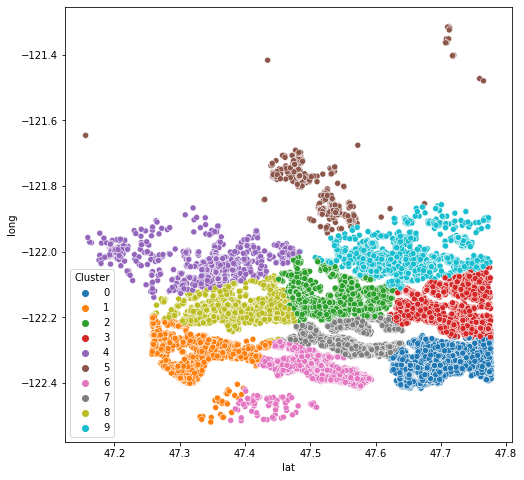

In [ ]:
plt.figure(figsize=(8, 8))
sn.scatterplot( data = X,
                x = 'lat',
                y = 'long',
                hue = 'Cluster');

## Feature Binning

### Quantile Based Binning

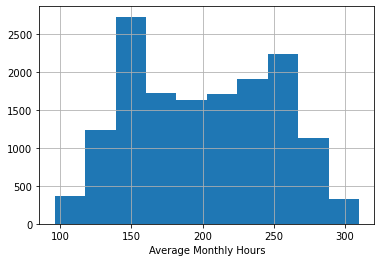

In [ ]:
#plt.hist(hr_df.average_montly_hours);
hr_df.average_montly_hours.hist();
plt.xlabel("Average Monthly Hours");

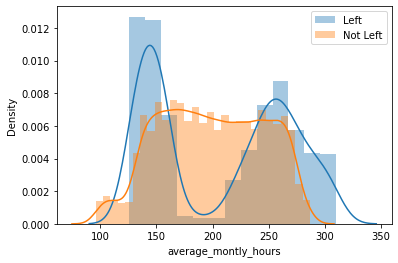

In [ ]:
sn.distplot(hr_df[hr_df.left == 1]['average_montly_hours'], label = 'Left');
sn.distplot(hr_df[hr_df.left == 0]['average_montly_hours'], label = 'Not Left');
plt.legend();

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
hours_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

In [ ]:
hours_bins.fit(hr_df[['average_montly_hours']])

KBinsDiscretizer(encode='ordinal', n_bins=3, strategy='uniform')

In [ ]:
hours_bins.bin_edges_

array([array([ 96.        , 167.33333333, 238.66666667, 310.        ])],
      dtype=object)

In [ ]:
hr_df['monthly_hours'] = hours_bins.transform(hr_df[['average_montly_hours']])

In [ ]:
hr_df[['average_montly_hours', 'monthly_hours']].sample(10)

,average_montly_hours,monthly_hours
9218,199,1.0
8947,115,0.0
10246,135,0.0
6961,160,0.0
7563,229,1.0
8034,270,2.0
8141,157,0.0
13719,168,1.0
6232,258,2.0
10821,208,1.0


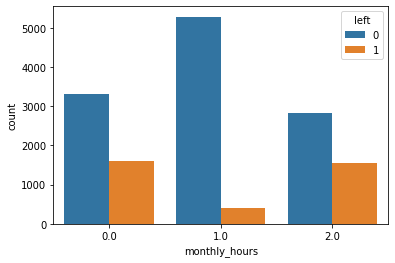

In [ ]:
sn.countplot(data = hr_df,
             x = 'monthly_hours',
             hue = 'left');

In [ ]:
pd.crosstab(hr_df.monthly_hours,
            hr_df.left,
            normalize='index')

left,0,1
monthly_hours,,
0.0,0.673511,0.326489
1.0,0.929087,0.070913
2.0,0.644758,0.355242
